In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plots
%matplotlib inline
tbl = Table.read_table("../anish/Downloads/DataSet_489/Spotify.csv")
tbl


track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.143,0.0322,1.01e-06,0.358,0.715,87.917,4,acoustic
4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.42,0.166,1,-17.235,1,0.0763,0.924,5.56e-06,0.101,0.267,77.489,4,acoustic
1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,0,-9.734,1,0.0557,0.21,0,0.117,0.12,76.332,4,acoustic
6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Soundtrack),Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.905,7.07e-05,0.132,0.143,181.74,3,acoustic
5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.443,2,-9.681,1,0.0526,0.469,0,0.0829,0.167,119.949,4,acoustic
01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.481,6,-8.807,1,0.105,0.289,0,0.189,0.666,98.017,4,acoustic
6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.147,2,-8.822,1,0.0355,0.857,2.89e-06,0.0913,0.0765,141.284,3,acoustic
1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.444,11,-9.331,1,0.0417,0.559,0,0.0973,0.712,150.96,4,acoustic
0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.414,0,-8.7,1,0.0369,0.294,0,0.151,0.669,130.088,4,acoustic
7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.632,1,-6.77,1,0.0295,0.426,0.00419,0.0735,0.196,78.899,4,acoustic


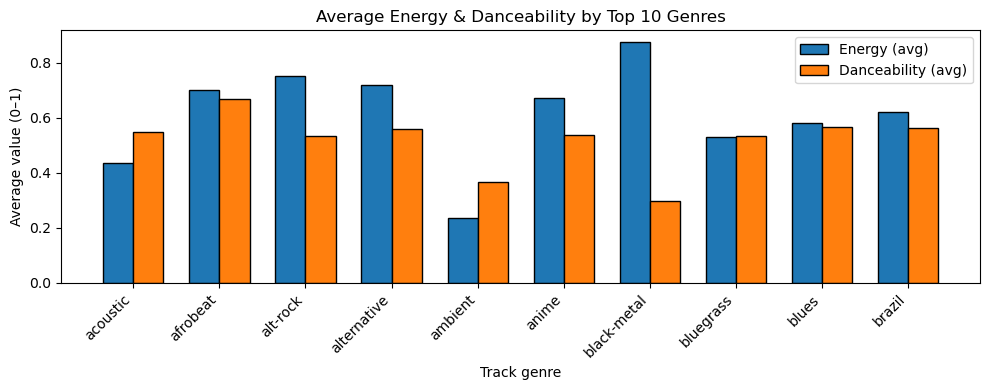

In [3]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plots
%matplotlib inline
tbl = Table.read_table("../anish/Downloads/DataSet_489/Spotify.csv")
# 2. Find the top 10 most common genres
genre_counts = tbl.group("track_genre")                 # gives columns: track_genre, count
top10_genres = (genre_counts
                .sort("count", descending=True)
                .take(np.arange(10))
                .column("track_genre"))

# 3. Keep only rows whose genre is in the top 10
top10_table = tbl.where("track_genre", are.contained_in(top10_genres))

# 4. Compute average energy and danceability for those genres
genre_sound = (top10_table
               .select("track_genre", "energy", "danceability")
               .group("track_genre", np.mean)
               .sort("track_genre"))   # just sort alphabetically for stable plotting

# 5. Prepare data for plotting
genres = genre_sound.column("track_genre")
energy_mean = genre_sound.column("energy mean")
dance_mean = genre_sound.column("danceability mean")

x = np.arange(len(genres))
width = 0.35

plots.figure(figsize=(10,4))
plots.bar(x - width/2, energy_mean, width, label="Energy (avg)")
plots.bar(x + width/2, dance_mean, width, label="Danceability (avg)")

plots.xticks(x, genres, rotation=45, ha="right")
plots.title("Average Energy & Danceability by Top 10 Genres")
plots.xlabel("Track genre")
plots.ylabel("Average value (0–1)")
plots.legend()
plots.tight_layout()
plots.show()


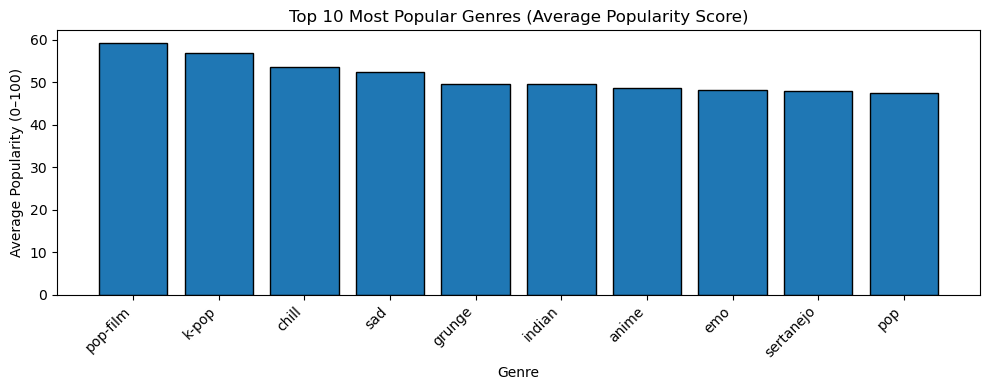

In [14]:
# Q2 – Which genres are the most popular overall?

# 1. Compute average popularity by genre
genre_pop = (tbl
             .select("track_genre", "popularity")
             .group("track_genre", np.mean)
             .sort("popularity mean", descending=True))

# 2. Take top 10 most popular genres
top10_pop = genre_pop.take(np.arange(min(10, genre_pop.num_rows)))

# 3. Extract columns
genres = top10_pop.column("track_genre")
pop_vals = top10_pop.column("popularity mean")

# 4. Plot
plots.figure(figsize=(10,4))
plots.bar(genres, pop_vals)
plots.title("Top 10 Most Popular Genres (Average Popularity Score)")
plots.xlabel("Genre")
plots.ylabel("Average Popularity (0–100)")
plots.xticks(rotation=45, ha="right")
plots.tight_layout()
plots.show()


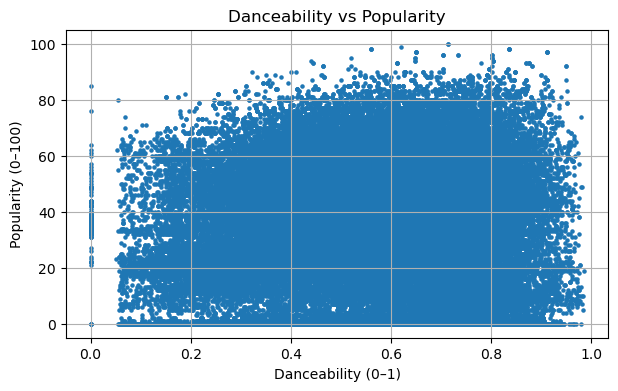

In [4]:
# Q3 – Danceability vs Popularity

dance = tbl.column("danceability")
pop = tbl.column("popularity")

plots.figure(figsize=(7,4))
plots.scatter(dance, pop, s=5)
plots.title("Danceability vs Popularity")
plots.xlabel("Danceability (0–1)")
plots.ylabel("Popularity (0–100)")
plots.grid(True)
plots.show()


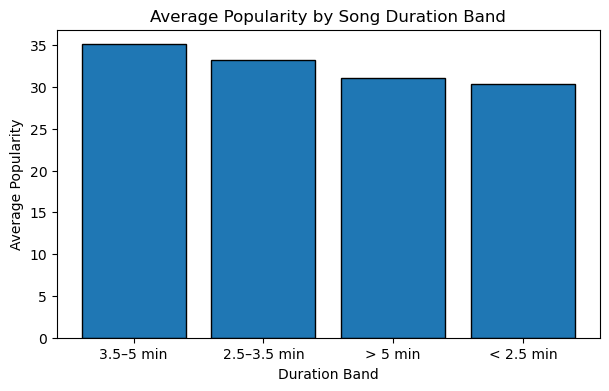

In [7]:
# Q4 – Popularity by duration band

# Convert duration to minutes
duration_min = tbl.column("duration_ms") / 60000.0

# Function to classify duration
def duration_band(d):
    if d < 2.5:
        return "< 2.5 min"
    elif d < 3.5:
        return "2.5–3.5 min"
    elif d < 5:
        return "3.5–5 min"
    else:
        return "> 5 min"

bands = np.array([duration_band(d) for d in duration_min])

# Add band column
tbl2 = tbl.with_column("duration_band", bands)

# Compute average popularity per band
dur_pop = (tbl2
           .select("duration_band", "popularity")
           .group("duration_band", np.mean)
           .sort("popularity mean", descending=True))

# Plot
plots.figure(figsize=(7,4))
plots.bar(dur_pop.column("duration_band"), dur_pop.column("popularity mean"))
plots.title("Average Popularity by Song Duration Band")
plots.xlabel("Duration Band")
plots.ylabel("Average Popularity")
plots.show()


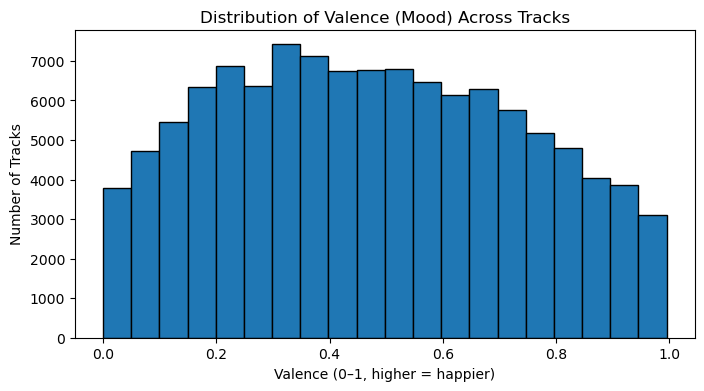

In [9]:
# Q5 – Valence (Mood) Distribution of Tracks

val = tbl.column("valence")

plots.figure(figsize=(8,4))
plots.hist(val, bins=20)
plots.title("Distribution of Valence (Mood) Across Tracks")
plots.xlabel("Valence (0–1, higher = happier)")
plots.ylabel("Number of Tracks")
plots.show()


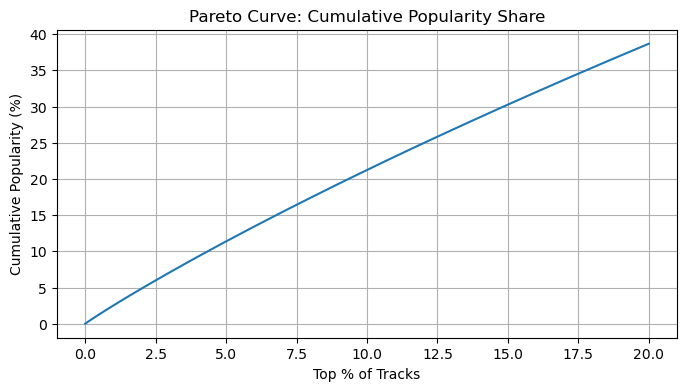

In [11]:
# Q6 – Popularity Concentration (Pareto Curve)

# Sort tracks by popularity
sorted_tbl = tbl.select("track_name", "popularity").sort("popularity", descending=True)

pop_vals = sorted_tbl.column("popularity")
total_pop = np.sum(pop_vals)

# Avoid divide by zero
if total_pop == 0:
    print("All popularity scores are zero.")
else:
    shares = pop_vals / total_pop
    cum_shares = np.cumsum(shares)

    # x-axis = % of tracks
    x = np.arange(1, len(pop_vals)+1) / len(pop_vals) * 100

    # Show first 20% for clarity
    cutoff = int(0.2 * len(pop_vals))

    plots.figure(figsize=(8,4))
    plots.plot(x[:cutoff], cum_shares[:cutoff] * 100)
    plots.title("Pareto Curve: Cumulative Popularity Share")
    plots.xlabel("Top % of Tracks")
    plots.ylabel("Cumulative Popularity (%)")
    plots.grid(True)
    plots.show()


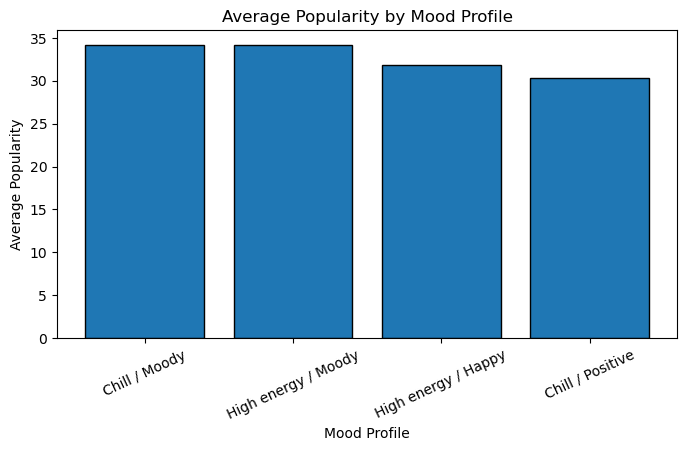

In [13]:
# Q7 – Mood Profiles (Energy + Valence)

energy_vals = tbl.column("energy")
valence_vals = tbl.column("valence")

def mood_profile(e, v):
    if e >= 0.6 and v >= 0.6:
        return "High energy / Happy"
    elif e >= 0.6 and v < 0.6:
        return "High energy / Moody"
    elif e < 0.6 and v >= 0.6:
        return "Chill / Positive"
    else:
        return "Chill / Moody"

profiles = np.array([mood_profile(e, v) for e, v in zip(energy_vals, valence_vals)])

tbl3 = tbl.with_column("mood_profile", profiles)

profile_pop = (tbl3
               .select("mood_profile", "popularity")
               .group("mood_profile", np.mean)
               .sort("popularity mean", descending=True))

plots.figure(figsize=(8,4))
plots.bar(profile_pop.column("mood_profile"), profile_pop.column("popularity mean"))
plots.title("Average Popularity by Mood Profile")
plots.xlabel("Mood Profile")
plots.ylabel("Average Popularity")
plots.xticks(rotation=25)
plots.show()
